# To reproduce a run and investigate seasonal transition signature

In [363]:
# Import libraries
import os
import sys
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

sys.path.append("../libs/cfe_py")
from bmi_cfe import BMI_CFE

sys.path.append("../libs/SMSig")
from sig_seasontrans import SMSig

# Specify current directory create output directory if it does not exist
os.getcwd()

'g:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\5_post_analysis'

# Configuration

In [364]:
site = "Coweeta"
case = rf"{site}-2024-03-20"


In [365]:
data_directory = rf"..\data\{site}"
config_temp_path = os.path.join(data_directory, "temporary_parameter_files_for_GLUE", "config_cfe_0.json")
prior_params_path = rf"..\3_GLUE_prerun\results\{case}\prior_parameters.csv"
evaluation_metrics_path = rf"..\3_GLUE_prerun\results\{case}\evaluation_metrics.csv"
out_path = rf".\results\{case}"
if not os.path.exists(out_path):
    os.makedirs(out_path)

# Load parameters for a run

In [366]:
eval_metrics = pd.read_csv(evaluation_metrics_path)
# eval_metrics[(eval_metrics['KGE on Soil']>0.71) & (eval_metrics['SeasonTrans of Soil dry2wet_end']>50)]
# 93, 32, 71
# eval_metrics[(eval_metrics['SeasonTrans of Soil wet2dry_start']<50)]
thresh = 30
subset = eval_metrics[(eval_metrics['SeasonTrans of Soil wet2dry_end']<=thresh)]
# subset = eval_metrics[(eval_metrics['SeasonTrans of Soil dry2wet_start']<=thresh) & (eval_metrics['SeasonTrans of Soil wet2dry_start']<=thresh)& (eval_metrics['SeasonTrans of Soil dry2wet_end']<=thresh) & (eval_metrics['SeasonTrans of Soil wet2dry_end']<=thresh)]
len(subset)
subset
# eval_metrics[(eval_metrics['KGE on Soil']>0.5)]
# run_id=190
# eval_metrics[(eval_metrics['KGE on Soil']>0.7) & (eval_metrics['SeasonTrans of Soil dry2wet_end']>50)]
# run_id=113, 9817

,run_id,NSE on Flow,NSE on Soil,KGE on Flow,KGE on Soil,SeasonTrans of Soil dry2wet_start,SeasonTrans of Soil dry2wet_end,SeasonTrans of Soil wet2dry_start,SeasonTrans of Soil wet2dry_end,SeasonTrans of Soil dry2wet_start_raw,SeasonTrans of Soil dry2wet_end_raw,SeasonTrans of Soil wet2dry_start_raw,SeasonTrans of Soil wet2dry_end_raw
0,0,0.098336,-1.138208,0.258648,0.596190,3.410046,12.776584,26.942204,8.690235,"[3.7596708103083074, 3.3006720393896103, 3.169...","[-37.97305789962411, 1.2408402101136744, -1.59...","[4.681615110952407, -58.56602273974568, nan]","[10.803520093206316, 6.576949757058173, nan]"
1,1,-0.424730,-1.141312,-0.007225,0.595095,3.367502,12.587929,26.947628,8.855043,"[3.7596479509957135, 3.315436783246696, 3.0274...","[-37.97457581711933, 1.2555419830605388, -1.04...","[4.808397399727255, -58.703652465716004, nan]","[10.803538050502539, 6.906547635793686, nan]"
2,2,-0.729017,-3.681862,-0.098234,0.490811,3.465368,12.275098,25.822499,8.878725,"[3.7786317840218544, 3.590049045626074, 3.0274...","[-37.302366830874234, 1.5371407088823617, -1.0...","[6.9214811800047755, -58.56647978536785, nan]","[11.26866597449407, 6.488784937188029, nan]"
5,5,-0.486068,-7.270514,0.002801,0.365099,3.534413,12.496447,25.335000,8.886591,"[3.759651360101998, 3.6225069826468825, 3.2210...","[-37.45465682866052, 1.5470197293907404, -1.58...","[7.8961311196908355, -58.566131461411715, nan]","[11.148550826590508, 6.6246315175667405, nan]"
6,6,-0.027344,-6.342267,0.197986,0.395813,3.533565,12.465491,25.708374,8.950864,"[3.7596427435055375, 3.6385905505158007, 3.202...","[-37.37994224531576, 1.5720685864798725, -1.58...","[7.058212332427502, -58.474960789084435, nan]","[11.514700133353472, 6.387027872726321, nan]"
8,8,-0.602694,-2.548206,-0.068489,0.533622,3.370375,12.621543,26.526521,8.932340,"[3.759647159371525, 3.3240362042561173, 3.0274...","[-38.03724111104384, 1.247382911387831, -1.074...","[5.902930267620832, -58.95597290759906, nan]","[10.803518686909229, 7.061160758603364, nan]"
9,9,-0.120358,-5.691611,0.119784,0.416455,3.503392,12.707903,25.328899,8.838455,"[3.7596595427021384, 3.513134672306478, 3.2373...","[-37.98714583879337, 1.4325443436391652, -1.56...","[7.908599112182856, -58.56639805668965, nan]","[10.803523233160377, 6.873385909479111, nan]"
11,11,0.018337,-1.759583,0.197815,0.567737,3.411632,12.804894,26.806275,8.816056,"[3.759613250847906, 3.2848948310129344, 3.1903...","[-38.035029561724514, 1.213823450729251, -1.59...","[4.953882816713303, -58.566433403640985, nan]","[10.803513974882662, 6.828597472049296, nan]"
16,16,-0.449290,-3.553196,0.024711,0.494426,3.441568,12.793468,26.324545,8.792989,"[3.7596380789764225, 3.3810717556625605, 3.183...","[-38.07042682822794, 1.3032496180385351, -1.61...","[5.917349338997155, -58.56643870193511, nan]","[10.803519448265433, 6.782458103261888, nan]"
18,18,-0.378248,-8.473634,0.023398,0.327869,3.490032,12.287990,25.316460,9.076668,"[3.7596607925370336, 3.6830077501945198, 3.027...","[-37.388649568427354, 1.6082719783298671, -1.0...","[7.933496807236224, -58.56641739513725, nan]","[11.492031962610781, 6.661303968634456, nan]"


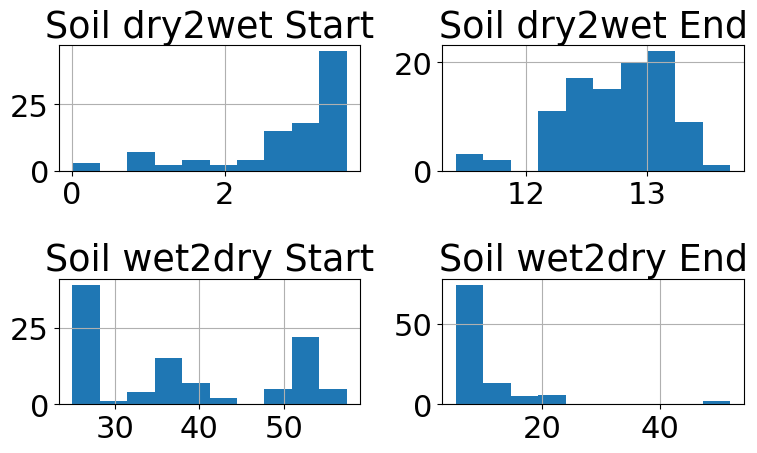

In [367]:
# Creating 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# Plotting each histogram
eval_metrics['SeasonTrans of Soil dry2wet_start'].hist(ax=axs[0, 0])
axs[0, 0].set_title('Soil dry2wet Start')

eval_metrics['SeasonTrans of Soil dry2wet_end'].hist(ax=axs[0, 1])
axs[0, 1].set_title('Soil dry2wet End')

eval_metrics['SeasonTrans of Soil wet2dry_start'].hist(ax=axs[1, 0])
axs[1, 0].set_title('Soil wet2dry Start')

eval_metrics['SeasonTrans of Soil wet2dry_end'].hist(ax=axs[1, 1])
axs[1, 1].set_title('Soil wet2dry End')

plt.tight_layout()
plt.show()

In [368]:
config_all_runs = pd.read_csv(prior_params_path)
config_all_runs.head()

,run_id,bb,satdk,slop,smcmax,wltsmc,max_gw_storage
0,0,4.300612,0.001262,0.090539,0.814280,1.785570e-07,0.207623
1,1,4.373599,0.016343,0.082694,0.804852,1.912302e-07,0.189000
2,2,5.493969,0.012023,0.047981,0.770639,2.033875e-07,0.157597
3,3,3.691392,0.011555,0.061635,0.776189,2.301230e-07,0.188717
4,4,2.951294,0.002321,0.018996,0.793927,1.622661e-07,0.204720


In [369]:

run_id = 77
config_target_runs = config_all_runs[config_all_runs["run_id"]==run_id]
print(config_target_runs)

    run_id        bb     satdk      slop    smcmax        wltsmc  \
77      77  4.181128  0.003433  0.013457  0.965503  1.722894e-07   

    max_gw_storage  
77        0.156088  


In [370]:
with open(config_temp_path, 'r') as outfile:
    config_temp = json.load(outfile)

In [371]:
for key, value in config_target_runs.items():
    if key == "run_id":
        None
    elif key in ['bb', 'satdk', 'slop', 'satpsi', 'smcmax', 'wltsmc', 'D']:
        config_temp["soil_params"][key] = value.values[0]
    else:
        config_temp[key] = value.values[0]
config_temp

{'forcing_file': 'G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/forcing_daily_2014_2018.csv',
 'catchment_area_km2': 0.121,
 'soil_params': {'bb': 4.181127539120852,
  'satdk': 0.0034332690483103,
  'slop': 0.0134569879517539,
  'satpsi': 0.141,
  'smcmax': 0.9655034375295292,
  'wltsmc': 1.7228940585236674e-07,
  'D': 0.6},
 'max_gw_storage': 0.1560882612653522,
 'Cgw': 0.001,
 'expon': 3,
 'K_lf': 0.9784460486586726,
 'K_nash': 1e-05,
 'num_nash_storage': 2,
 'giuh_ordinates': [0.5, 0.5],
 'trigger_z_fact': 0.570054772877,
 'alpha_fc': 0.33,
 'refkdt': 3,
 'stand_alone': 1,
 'unit_test': 1,
 'time_step_size': 86400,
 'compare_results_file': 'G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/test_daily_2014_2018_sm_basinavg.csv'}

In [372]:
temporary_config_path = "temporary_config_reproducing_run"
if not os.path.exists(temporary_config_path):
    os.makedirs(temporary_config_path)

In [373]:
temporary_config_file = os.path.join(temporary_config_path, f"config_cfe_{run_id}.json")
with open(temporary_config_file, 'w') as out_file:
    json.dump(config_temp, out_file)

# Run CFE

GW & SM converged <1% after warm-up iteration 1; diff_gw: 0.0000000; diff_sm: 0.0000000


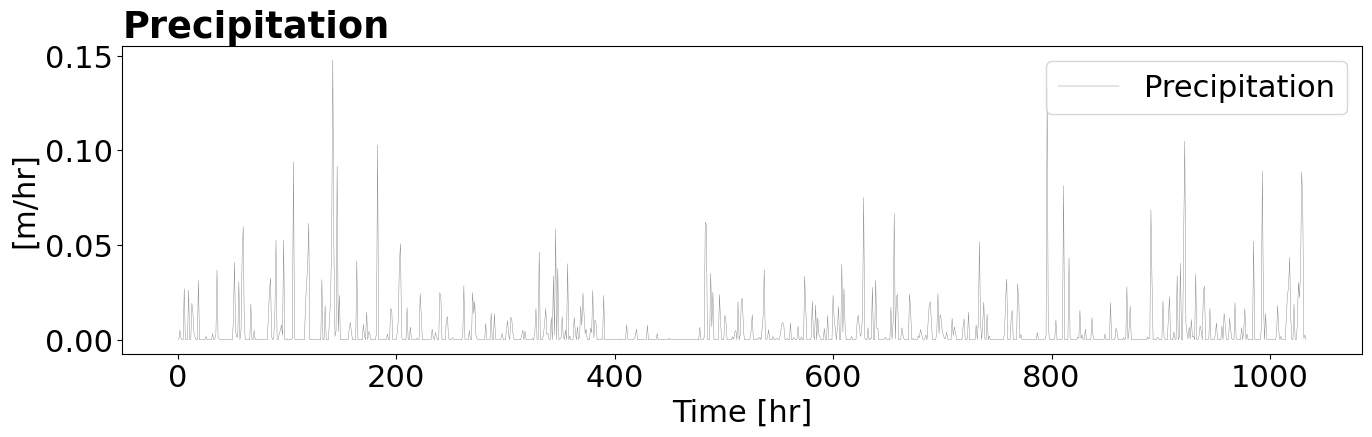

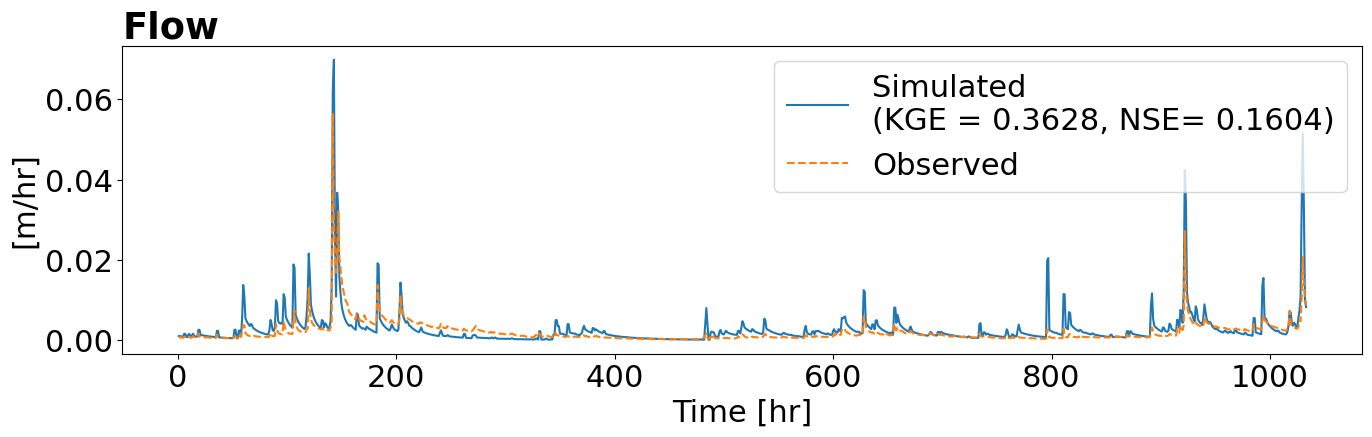

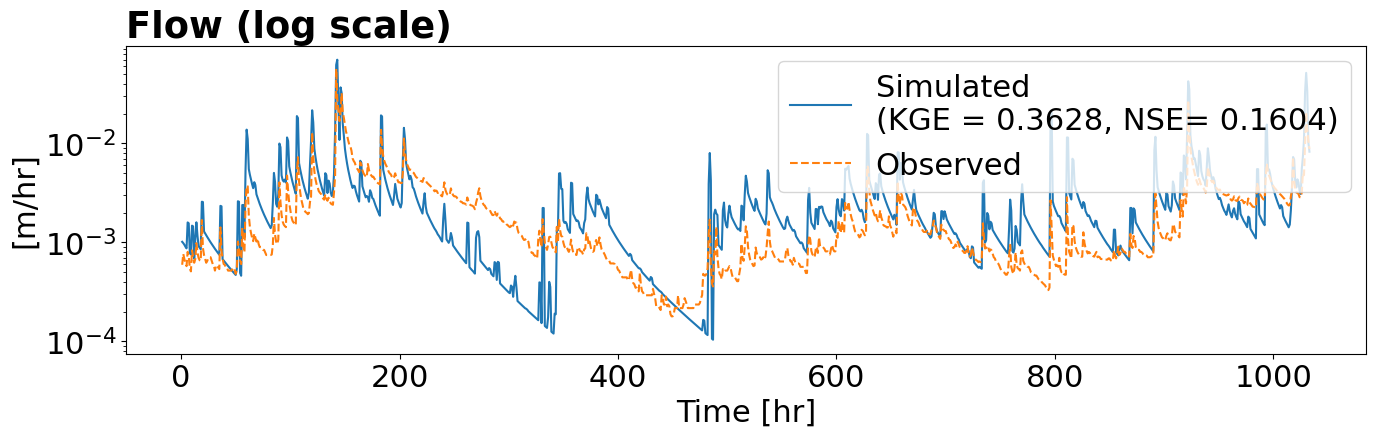

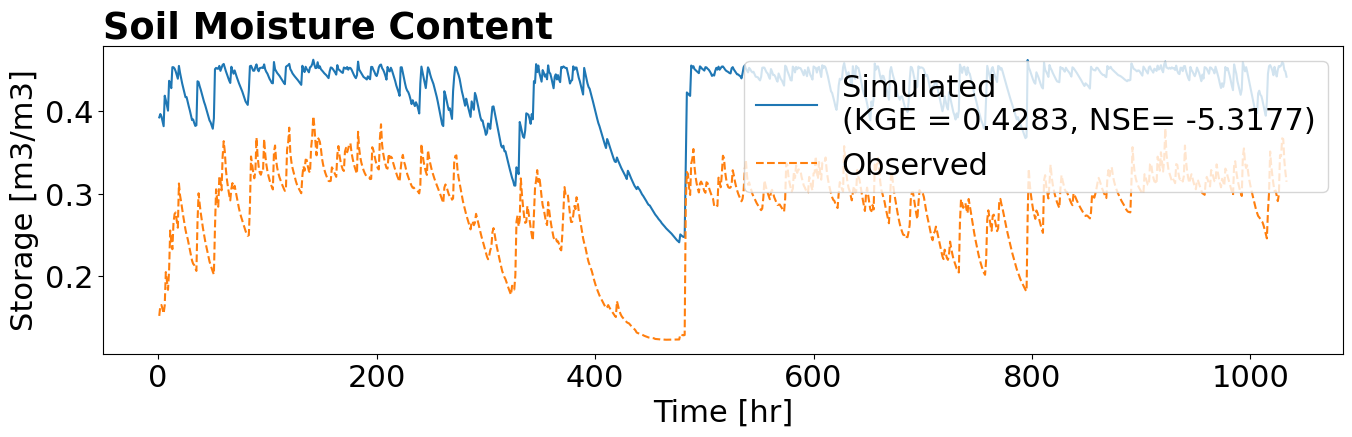

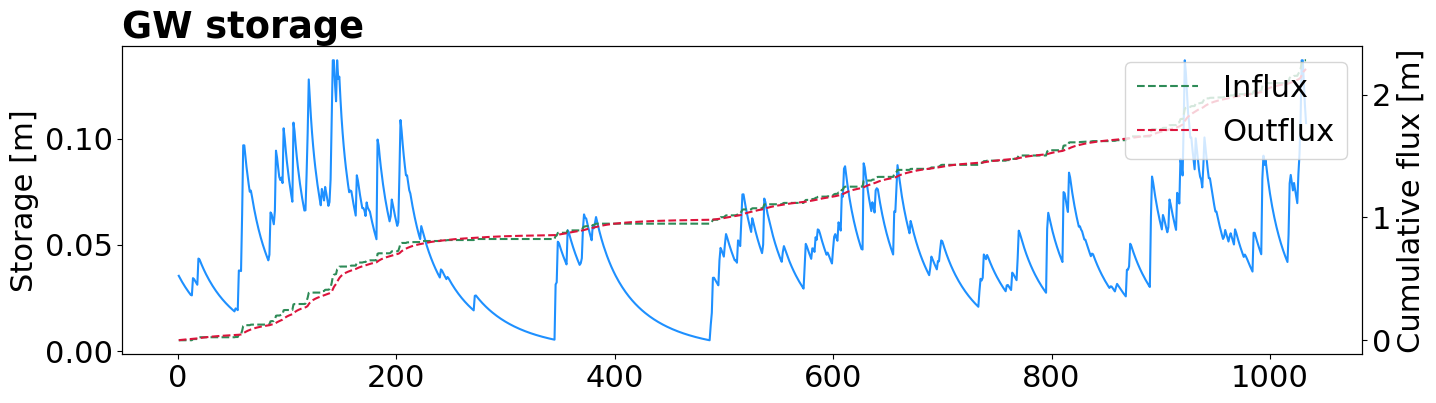

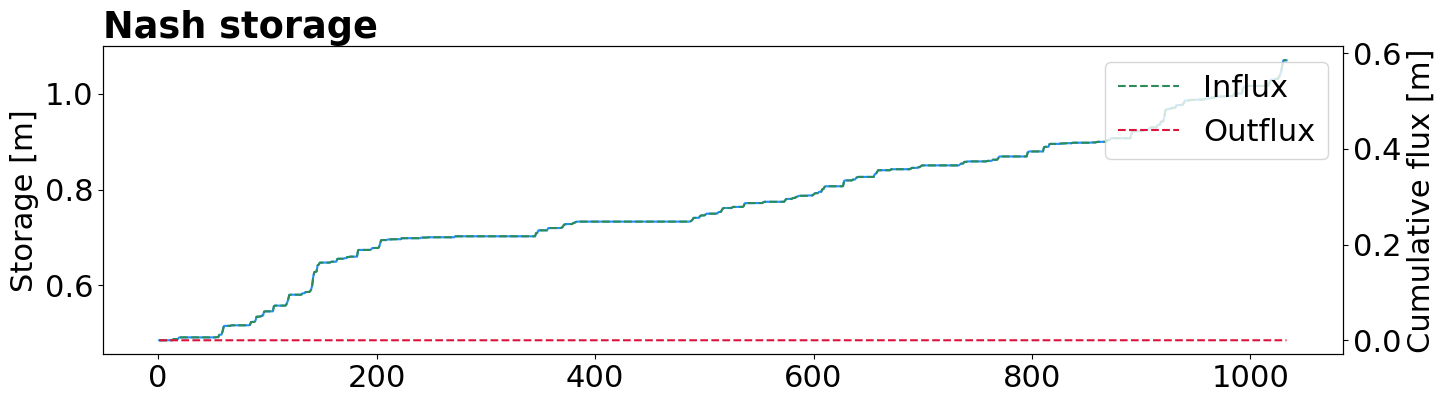

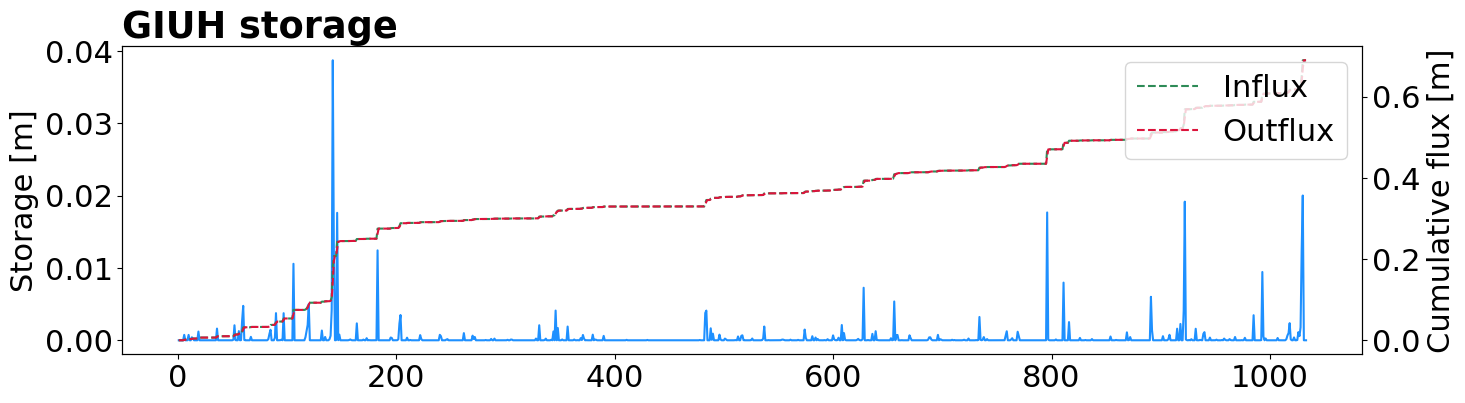

(      Soil Moisture Content
 0                  0.153545
 1                  0.151452
 2                  0.164292
 3                  0.164678
 4                  0.159843
 ...                     ...
 1030               0.366092
 1031               0.339694
 1032               0.325503
 1033               0.314286
 1034               0.304777
 
 [1035 rows x 1 columns],
       Soil Moisture Content
 0                  0.399441
 1                  0.392480
 2                  0.396551
 3                  0.393642
 4                  0.387710
 ...                     ...
 1030               0.458087
 1031               0.449956
 1032               0.448020
 1033               0.441838
 1034               0.436793
 
 [1035 rows x 1 columns])

In [374]:
# Run the CFE based on the config file
cfe_instance = BMI_CFE(temporary_config_file)
cfe_instance.initialize()
sim0 = cfe_instance.run_unit_test(plot=True,
    print_fluxes=True,
    plot_lims=list(range(1, 1034)),
    warm_up=True,
    warmup_offset=400,
    warmup_iteration=10
    )
obs0 = cfe_instance.load_unit_test_data()

# Get the results
var_name = 'Soil Moisture Content'
sim = sim0[["Time", var_name]].copy()
sim["Time"] = pd.to_datetime(sim["Time"], format="%Y-%m-%d")  # Works specifically for CFE

# Get the comparison data
obs = obs0[["Time", var_name]].copy()
obs["Time"] = pd.to_datetime(obs["Time"], format="%Y-%m-%d") 
# if study_site == "Mahurangi":
#     obs["Time"] = pd.to_datetime(obs["Time"], format="%m/%d/%Y %H:%M")  # Works specifically for Mahurangi data
# elif study_site == "LittleWashita":
#     obs["Time"] = pd.to_datetime(obs["Time"], format="%Y-%m-%d %H:%M:%S")  # works for Little ashita
# # obs["Time"] = pd.to_datetime(obs["Time"], format="%d-%m-%Y %H:%M:%S")

# Merge observed and simulated timeseries
df = pd.merge_asof(sim, obs, on="Time")

sim_synced = pd.DataFrame()
obs_synced = pd.DataFrame()
sim_synced[var_name] = df[var_name + "_x"].copy()
obs_synced[var_name] = df[var_name + "_y"].copy()

obs_synced, sim_synced

# Run seasonal signature

In [375]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    t=df["Time"].to_numpy(),
    sm=obs_synced[var_name].to_numpy(),
    plot_results=False,
)

seasonal_cycle = pd.read_csv(os.path.join(data_directory, "seasonal_cycle.csv"), parse_dates=['start_date', 'end_date'])

_parameter_config = os.path.join(data_directory, "seasonal_transition_config.json")
with open(_parameter_config, "r") as config_file:
    config = json.load(config_file)

season_trans_obs = sig_obs.calc_seasontrans(seasonal_cycle=seasonal_cycle, parameter_config=config)

sig_sim = SMSig(
    t=df["Time"].to_numpy(),
    sm=sim_synced[var_name].to_numpy(),
    plot_results=False,
)
season_trans_sim = sig_sim.calc_seasontrans(seasonal_cycle=seasonal_cycle, parameter_config=config)

# Get the deviations in seasonal transition dates between simulated and observed timeseries
diff = season_trans_sim - season_trans_obs
metric_value = abs(np.nanmean(diff, axis=0))
print(diff)
print(metric_value)



Check seasonal_cycle.csv
Check seasonal_cycle.csv
[[  3.75965246 -37.46329177   6.93664973  10.80351662]
 [  3.49672255   1.42273844 -57.566641     6.06119448]
 [  3.05611923  -1.73362458          nan          nan]]
[ 3.43749808 12.59139264 25.31499563  8.43235555]


# Load evaluation metrics

In [376]:
result_run = pd.read_csv(evaluation_metrics_path)
KGESM_for_the_run = result_run['KGE on Soil'][result_run["run_id"]==run_id].values[0]
print(KGESM_for_the_run)
result_run.head()

0.4329787454281021


,run_id,NSE on Flow,NSE on Soil,KGE on Flow,KGE on Soil,SeasonTrans of Soil dry2wet_start,SeasonTrans of Soil dry2wet_end,SeasonTrans of Soil wet2dry_start,SeasonTrans of Soil wet2dry_end,SeasonTrans of Soil dry2wet_start_raw,SeasonTrans of Soil dry2wet_end_raw,SeasonTrans of Soil wet2dry_start_raw,SeasonTrans of Soil wet2dry_end_raw
0,0,0.098336,-1.138208,0.258648,0.596190,3.410046,12.776584,26.942204,8.690235,"[3.7596708103083074, 3.3006720393896103, 3.169...","[-37.97305789962411, 1.2408402101136744, -1.59...","[4.681615110952407, -58.56602273974568, nan]","[10.803520093206316, 6.576949757058173, nan]"
1,1,-0.424730,-1.141312,-0.007225,0.595095,3.367502,12.587929,26.947628,8.855043,"[3.7596479509957135, 3.315436783246696, 3.0274...","[-37.97457581711933, 1.2555419830605388, -1.04...","[4.808397399727255, -58.703652465716004, nan]","[10.803538050502539, 6.906547635793686, nan]"
2,2,-0.729017,-3.681862,-0.098234,0.490811,3.465368,12.275098,25.822499,8.878725,"[3.7786317840218544, 3.590049045626074, 3.0274...","[-37.302366830874234, 1.5371407088823617, -1.0...","[6.9214811800047755, -58.56647978536785, nan]","[11.26866597449407, 6.488784937188029, nan]"
3,3,-0.391320,0.628711,0.005140,0.668303,3.191448,12.788306,37.004780,9.935460,"[3.7594453040510416, 2.7874916060827672, 3.027...","[-38.21320300735533, 0.9141181083396077, -1.06...","[-15.115205691661686, -58.89435475319624, nan]","[12.8035774580203, 7.067343353759497, nan]"
4,4,0.452827,0.338964,0.522743,0.616256,2.892248,13.225828,39.876682,9.178478,"[3.282781452871859, 2.3671279661357403, 3.0268...","[-38.390281775500625, 0.47593485144898295, -1....","[-21.51505861664191, -58.23830584064126, nan]","[11.803518417291343, 6.553438150789589, nan]"


# Plot the results

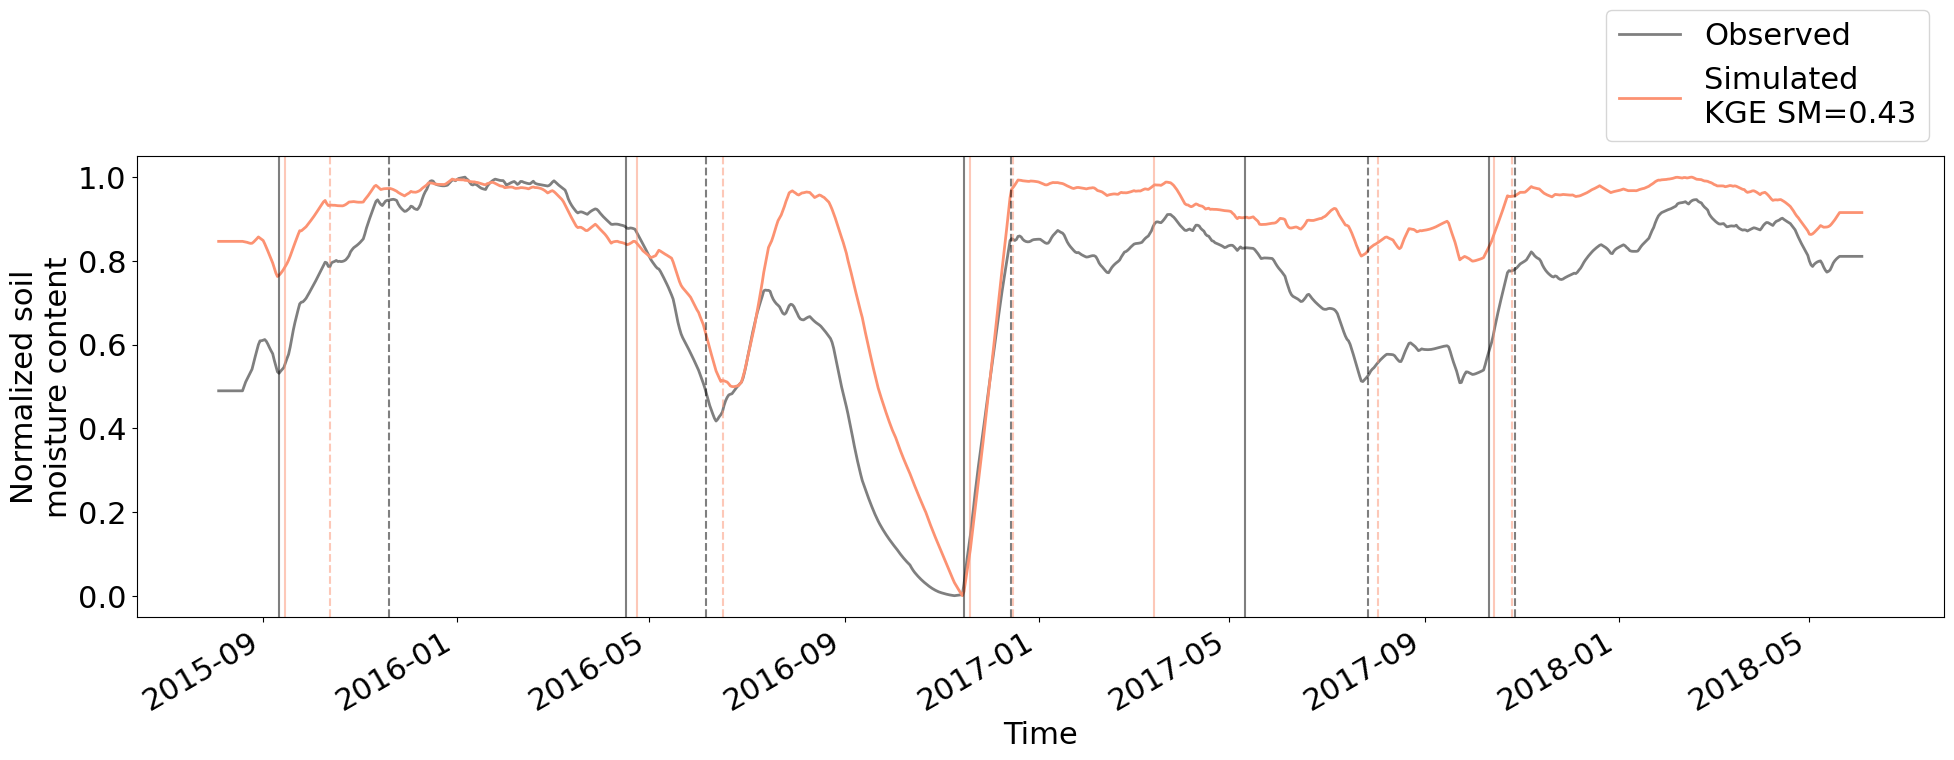

In [377]:
# Relative values of SM 
# Plot out the results
df_obs = obs_synced
df_sim = sim_synced
obs_label = 'Observed'
sim_label = f'Simulated\nKGE SM={KGESM_for_the_run:.2f}'
obs_color = 'k'
sim_color = '#fc9272'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.pdf'

f2 = plt.figure(figsize=(20, 8))
ax3 = f2.add_subplot()
plt.rc('font', size=22)
x_obs = sig_obs.tt.index
y_obs = (sig_obs.tt.values-min(sig_obs.tt.values))/(max(sig_obs.tt.values)-min(sig_obs.tt.values))
x_sim = sig_sim.tt.index
y_sim = (sig_sim.tt.values-min(sig_sim.tt.values))/(max(sig_sim.tt.values)-min(sig_sim.tt.values))
xlim_start = 0 #60
xlim_end = len(x_obs) #-60
ax3.plot(x_obs[xlim_start:xlim_end], y_obs[xlim_start:xlim_end], alpha=0.5, label=obs_label, color=obs_color, linewidth=2)
ax3.plot(x_sim[xlim_start:xlim_end], y_sim[xlim_start:xlim_end], alpha=1, label=sim_label, color=sim_color, linewidth=2)

import numpy as np
from datetime import datetime, timedelta
def julian_to_datetime(jd):
    try:
        return datetime(1, 1, 1) + timedelta(days=jd - 1721425)
    except Exception as e:
        # Return np.nan if there's an error
        return np.nan

stard_dates_jd = np.concatenate([season_trans_obs[:, 0], season_trans_obs[:, 2]])
start_dates_obs = [julian_to_datetime(jd) for jd in stard_dates_jd]
end_dates_jd = np.concatenate([season_trans_obs[:, 1], season_trans_obs[:, 3]])
end_dates_obs = [julian_to_datetime(jd) for jd in end_dates_jd]

stard_dates_jd_sim = np.concatenate([season_trans_sim[:, 0], season_trans_sim[:, 2]])
start_dates_sim = [julian_to_datetime(jd) for jd in stard_dates_jd_sim]
end_dates_jd_sim = np.concatenate([season_trans_sim[:, 1], season_trans_sim[:, 3]])
end_dates_sim = [julian_to_datetime(jd) for jd in end_dates_jd_sim]

for i in range(len(start_dates_obs)):
    ax3.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax3.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
for i in range(len(start_dates_sim)):
    ax3.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_sim)):
    ax3.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax3.set_xlabel('Time')
from datetime import datetime
ax3.set_ylabel('Normalized soil\nmoisture content')
# ax3.set_title(title)
ax3.legend(loc='lower right', bbox_to_anchor=(1,1))
plt.tight_layout()
f2.autofmt_xdate()
f2.savefig(os.path.join(out_path, fn), dpi=600, bbox_inches='tight')

In [378]:
start_dates_obs

[datetime.datetime(2015, 9, 10, 17, 46, 7, 249739),
 datetime.datetime(2016, 11, 15, 6, 12, 22, 709309),
 datetime.datetime(2017, 10, 11, 11, 20, 30, 414180),
 datetime.datetime(2016, 4, 16, 8, 39, 4, 633041),
 datetime.datetime(2017, 5, 11, 1, 35, 38, 715363),
 nan]

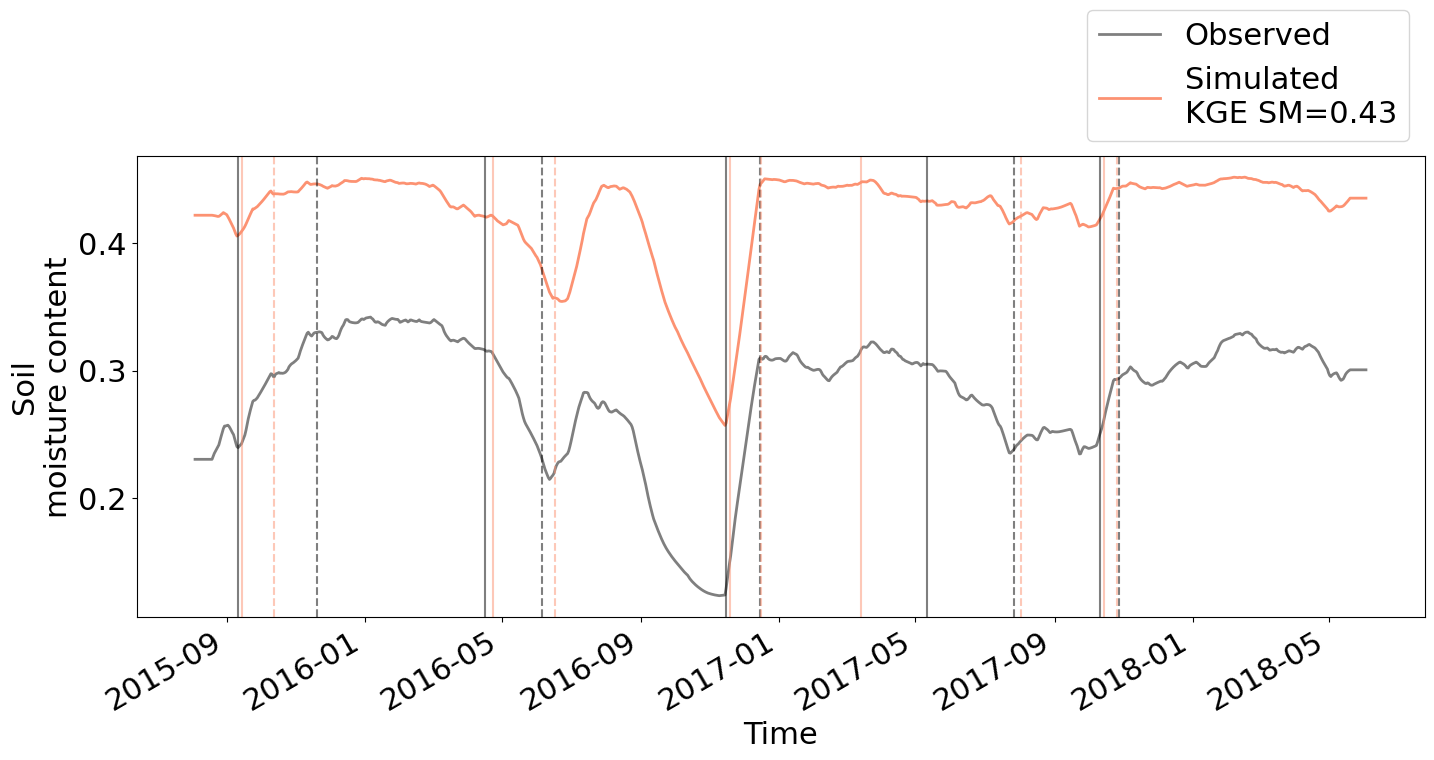

In [379]:
# Relative values of SM 
# Plot out the results
df_obs = obs_synced
df_sim = sim_synced
obs_label = 'Observed'
sim_label = f'Simulated\nKGE SM={KGESM_for_the_run:.2f}'
obs_color = 'k'
sim_color = '#fc9272'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.pdf'

f2 = plt.figure(figsize=(15, 8))
ax3 = f2.add_subplot()
plt.rc('font', size=22)
x_obs = sig_obs.tt.index
y_obs = sig_obs.tt.values
x_sim = sig_sim.tt.index
y_sim = sig_sim.tt.values
xlim_start = 0
xlim_end = len(x_obs)
ax3.plot(x_obs[xlim_start:xlim_end], y_obs[xlim_start:xlim_end], alpha=0.5, label=obs_label, color=obs_color, linewidth=2)
ax3.plot(x_sim[xlim_start:xlim_end], y_sim[xlim_start:xlim_end], alpha=1, label=sim_label, color=sim_color, linewidth=2)
for i in range(len(start_dates_obs)):
    ax3.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax3.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
for i in range(len(start_dates_sim)):
    ax3.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_sim)):
    ax3.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax3.set_xlabel('Time')
from datetime import datetime
ax3.set_ylabel('Soil\nmoisture content')
# ax3.set_ylim([0.30, 0.65])
# ax3.set_xlim(datetime(1998, 1,1), datetime(2001, 9, 30))
ax3.legend(loc='lower right', bbox_to_anchor=(1,1))
plt.tight_layout()
f2.autofmt_xdate()
f2.savefig(os.path.join(out_path, fn), dpi=600, bbox_inches='tight')

sig_sim.tt.to_csv(os.path.join(out_path, 'simulated.csv'))
sig_obs.tt.to_csv(os.path.join(out_path, 'observed.csv'))